In [1]:
##@author: pradeep

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np


In [2]:
# Original data set "af"
af= pd.read_csv(r"C:\\Tally.ERP 9\\Personal\\Exams\\2020 Study Areas\\Coursera\\Capstone\\2\\Data-Collisions.csv")
af


C:\Users\pradeep\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N


In [3]:
## Describe data $$$$$$$$$$
af.info()
af.isnull().sum()
af.describe()
af.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [4]:
# bf = stripped dataframe. Data cleansing. Retaining only the most important columns
bf= af[['SEVERITYCODE','ADDRTYPE','LOCATION','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INCDATE','JUNCTIONTYPE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','ST_COLDESC','HITPARKEDCAR']]
bf.info()
bf.isnull().sum()
bf.describe()
bf.columns



bf.isnull().values.any()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SEVERITYCODE   194673 non-null  int64 
 1   ADDRTYPE       192747 non-null  object
 2   LOCATION       191996 non-null  object
 3   COLLISIONTYPE  189769 non-null  object
 4   PERSONCOUNT    194673 non-null  int64 
 5   PEDCOUNT       194673 non-null  int64 
 6   PEDCYLCOUNT    194673 non-null  int64 
 7   VEHCOUNT       194673 non-null  int64 
 8   INCDATE        194673 non-null  object
 9   JUNCTIONTYPE   188344 non-null  object
 10  UNDERINFL      189789 non-null  object
 11  WEATHER        189592 non-null  object
 12  ROADCOND       189661 non-null  object
 13  LIGHTCOND      189503 non-null  object
 14  SPEEDING       9333 non-null    object
 15  ST_COLDESC     189769 non-null  object
 16  HITPARKEDCAR   194673 non-null  object
dtypes: int64(5), object(12)
memory usage: 25.2+ MB


True

In [5]:
cf=bf.iloc[:,[0,8,1,2,3,15,16,11,12,13,14,9,10,4,5,6,7]]
cf.columns
cf.to_csv("cf.csv", encoding = "utf-8")



In [6]:

##########################  date & Time split   INCDATE 2013/03/27 00:00:00+00
def month(string):    
    return (string[5:7])

C:\Users\pradeep\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

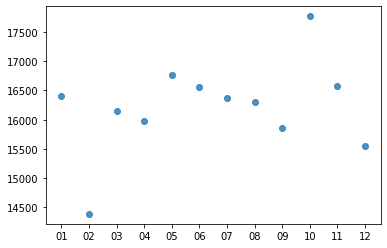

In [7]:
cf['Month']=cf['INCDATE'].apply(lambda x: month(x))
mh=cf[['Month', 'PERSONCOUNT']].groupby(['Month'], as_index=False).count().sort_values( 'Month', ascending=True).head(20)
mh
mp= sn.regplot(x=mh["Month"], y=mh["PERSONCOUNT"], data=mh)

In [8]:
def year(string):
    s=string[0:4]
    return (s)

C:\Users\pradeep\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

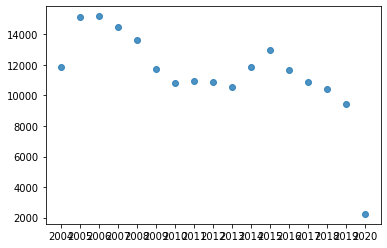

In [9]:
cf['Year']=cf['INCDATE'].apply(lambda x: year(x))
#df['Year']=int(df['Year'])

yh=cf[['Year', 'PERSONCOUNT']].groupby(['Year'], as_index=False).count().sort_values( 'Year', ascending=True).head(20)
yh
yp= sn.regplot(x=yh["Year"], y=yh["PERSONCOUNT"], data=yh)


In [10]:
df=cf.iloc[:,[0,1,18,17,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]
df.to_csv("df.csv", encoding = "utf-8")


In [11]:
corr1=df.corr()
corr1.to_csv("corr1.csv", encoding = "utf-8")
print(corr1)
import os
os.getcwd()

              SEVERITYCODE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT
SEVERITYCODE      1.000000     0.130949  0.246338     0.214218 -0.054686
PERSONCOUNT       0.130949     1.000000 -0.023464    -0.038809  0.380523
PEDCOUNT          0.246338    -0.023464  1.000000    -0.016920 -0.261285
PEDCYLCOUNT       0.214218    -0.038809 -0.016920     1.000000 -0.253773
VEHCOUNT         -0.054686     0.380523 -0.261285    -0.253773  1.000000


'C:\\Users\\pradeep'

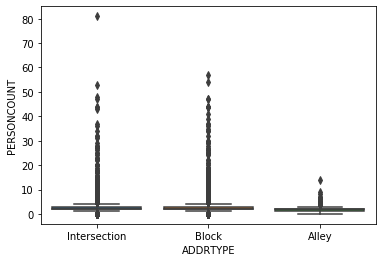

In [12]:
sn.boxplot(x="ADDRTYPE", y="PERSONCOUNT", data=df)
#sn.boxplot(x=", y="", data=roa)


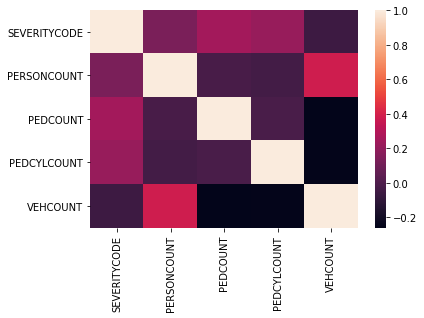

In [13]:
sn.heatmap(df.corr())


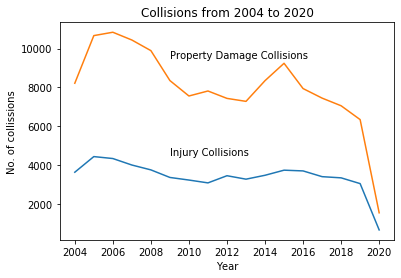

In [14]:
###Year
ye=(df.SEVERITYCODE.eq(2).astype(int).groupby(df.Year).sum())
ye2=(df.SEVERITYCODE.eq(1).astype(int).groupby(df.Year).sum())
ye.plot(kind='line')
ye2.plot(kind='line')
plt.text(5, 4500, 'Injury Collisions')
plt.text(5, 9500, 'Property Damage Collisions')
plt.xlabel("Year") 
plt.ylabel("No. of collissions") 
plt.title("Collisions from 2004 to 2020") 
plt.show()

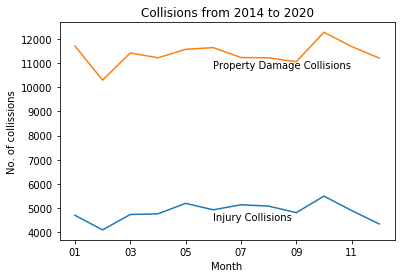

In [15]:
##MONTH
mo=df.SEVERITYCODE.eq(2).astype(int).groupby(df.Month).sum()
mo2=df.SEVERITYCODE.eq(1).astype(int).groupby(df.Month).sum()
mo.plot(kind='line')
mo2.plot(kind='line')
plt.text(5, 4500, 'Injury Collisions')
plt.text(5, 10800, 'Property Damage Collisions')
plt.xlabel("Month") 
plt.ylabel("No. of collissions") 
plt.title("Collisions from 2014 to 2020") 
plt.show()

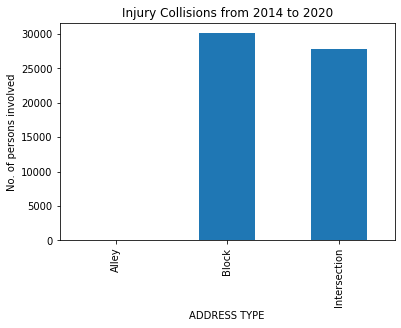

In [16]:
##ADDRESS TYPE
addtype=df.SEVERITYCODE.eq(2).astype(int).groupby(df.ADDRTYPE).sum()
addtype.plot(kind='bar')
plt.xlabel("ADDRESS TYPE") 
plt.ylabel("No. of persons involved") 
plt.title("Injury Collisions from 2014 to 2020") 
plt.show()

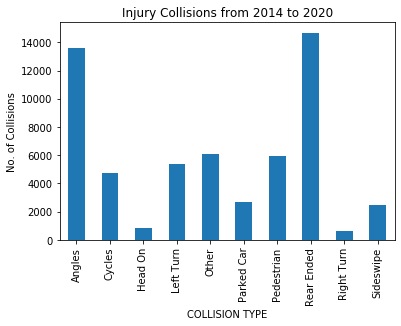

In [17]:
coll=df.SEVERITYCODE.eq(2).astype(int).groupby(df.COLLISIONTYPE).sum()
coll.plot(kind='bar')
plt.xlabel("COLLISION TYPE") 
plt.ylabel("No. of Collisions") 
plt.title("Injury Collisions from 2014 to 2020") 
plt.show()

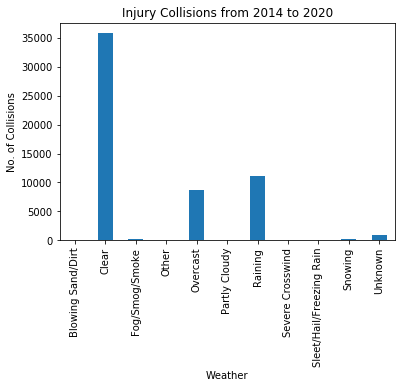

In [18]:
#Weather
wea=df.SEVERITYCODE.eq(2).astype(int).groupby(df.WEATHER).sum()
wea.plot(kind='bar')
plt.xlabel("Weather") 
plt.ylabel("No. of Collisions") 
plt.title("Injury Collisions from 2014 to 2020") 
plt.show()

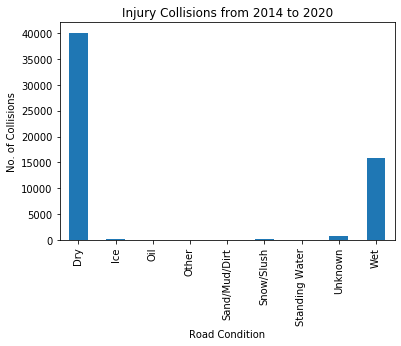

pandas.core.series.Series

In [19]:
#Roadcondition
roa=df.SEVERITYCODE.eq(2).astype(int).groupby(df.ROADCOND).sum()
roa.plot(kind='bar')
plt.xlabel("Road Condition") 
plt.ylabel("No. of Collisions") 
plt.title("Injury Collisions from 2014 to 2020") 
plt.show()
type(roa)

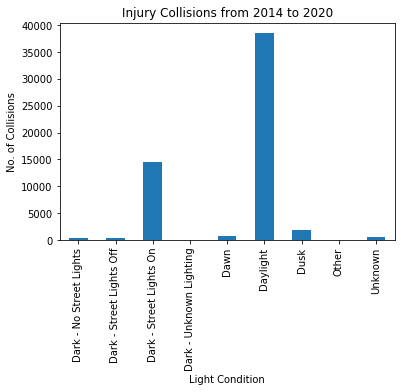

In [20]:
#Lightcondition
lig=df.SEVERITYCODE.eq(2).astype(int).groupby(df.LIGHTCOND).sum()
lig.plot(kind='bar')
plt.xlabel("Light Condition") 
plt.ylabel("No. of Collisions") 
plt.title("Injury Collisions from 2014 to 2020") 
plt.show()


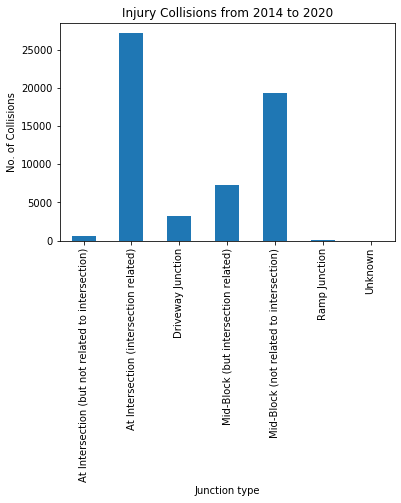

In [21]:
#JUnctionType
jun=df.SEVERITYCODE.eq(2).astype(int).groupby(df.JUNCTIONTYPE).sum()
jun.plot(kind='bar')
plt.xlabel("Junction type") 
plt.ylabel("No. of Collisions") 
plt.title("Injury Collisions from 2014 to 2020") 
plt.show()


In [22]:
##  Collision type & Person count   $$$$$$$
df[['COLLISIONTYPE', 'PERSONCOUNT']].groupby(['COLLISIONTYPE'], as_index=False).count().sort_values( 'PERSONCOUNT', ascending=False).head(3)


,COLLISIONTYPE,PERSONCOUNT
5,Parked Car,47987
0,Angles,34674
7,Rear Ended,34090


In [23]:
##  Collision type & Person count   $$$$$$$
df[['ADDRTYPE', 'PERSONCOUNT']].groupby(['ADDRTYPE'], as_index=False).count().sort_values( 'PERSONCOUNT', ascending=False).head(10)


,ADDRTYPE,PERSONCOUNT
1,Block,126926
2,Intersection,65070
0,Alley,751


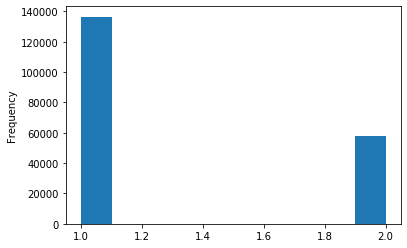

In [24]:
df["SEVERITYCODE"].plot(kind='hist')
plt.show()